In [2]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [3]:
# importing the dataset
df = pd.read_csv('avocado.csv')
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
# first ten elements of the dataset
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
# checking the data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
#Statistical description of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


Means vary alot, we will have to scale the features to bring them within a good range
Standard dwviations are also out of range which indicates skewness

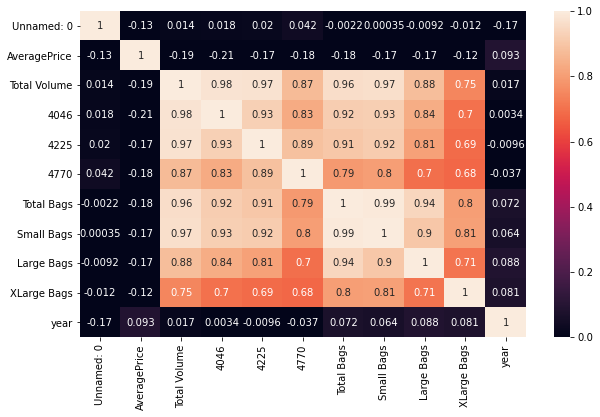

In [8]:
# Let's take a look at the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [9]:
#Checking the shape of the data
df.shape

(18249, 14)

In [10]:
#Checking for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values, so we won't be treating any null values

Now we will explore the data

<AxesSubplot:title={'center':'Distribution Average Price'}, xlabel='AveragePrice', ylabel='Density'>

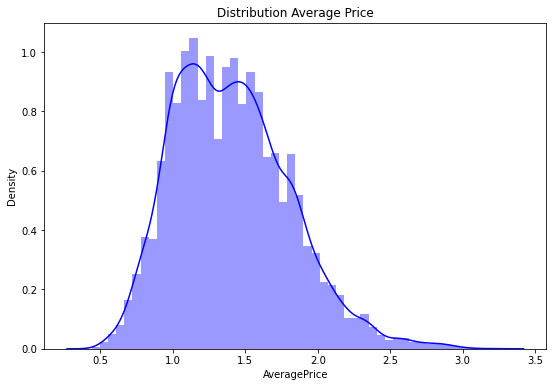

In [11]:
# Let's take a look at the price column
plt.figure(figsize = (9,6))
plt.title('Distribution Average Price')
sns.distplot(df['AveragePrice'], color = 'b')

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

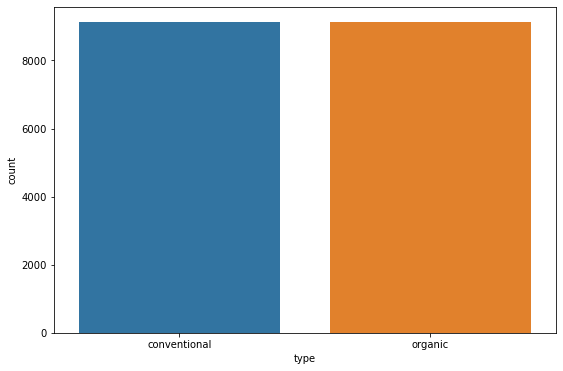

In [12]:
# Let's took a look at the quantity of each type of Avocado
print(df['type'].value_counts())
plt.figure(figsize =(9,6))
sns.countplot('type', data = df)

They share almost equal proportion of the data

<AxesSubplot:title={'center':'price of each type avocado'}, xlabel='type', ylabel='AveragePrice'>

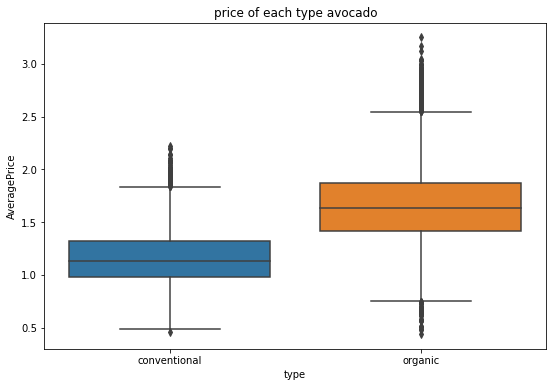

In [13]:
# Let's take a look at the average price of each type
plt.figure(figsize = (9,6))
plt.title('price of each type avocado')
sns.boxplot(x= 'type', y = 'AveragePrice', data = df)


In [14]:
type_org = df[df['type']== 'organic']
type_con = df[df['type']=='conventional']
print(np.mean(type_org.AveragePrice))
print(np.mean(type_con.AveragePrice))

1.6539986846432082
1.1580396668858206


We can see that the organic avocados are more expensive than the conventional avocados

<AxesSubplot:title={'center':'Avocado price in each Region'}, xlabel='region', ylabel='AveragePrice'>

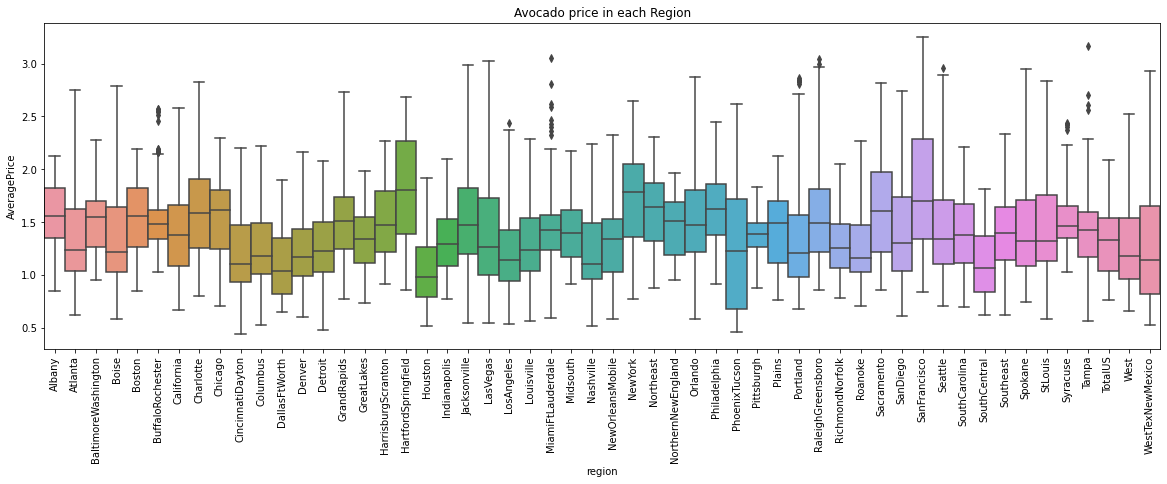

In [15]:
# Lets look at the prices in various regions
plt.figure(figsize =(20,6))
plt.title('Avocado price in each Region')
plt.xticks(rotation ='vertical')
sns.boxplot(x = 'region', y = 'AveragePrice', data = df, width = 1, whis= 2)

The prices differ in various regions, if we look closely we notice that the prices are much higher in cities 

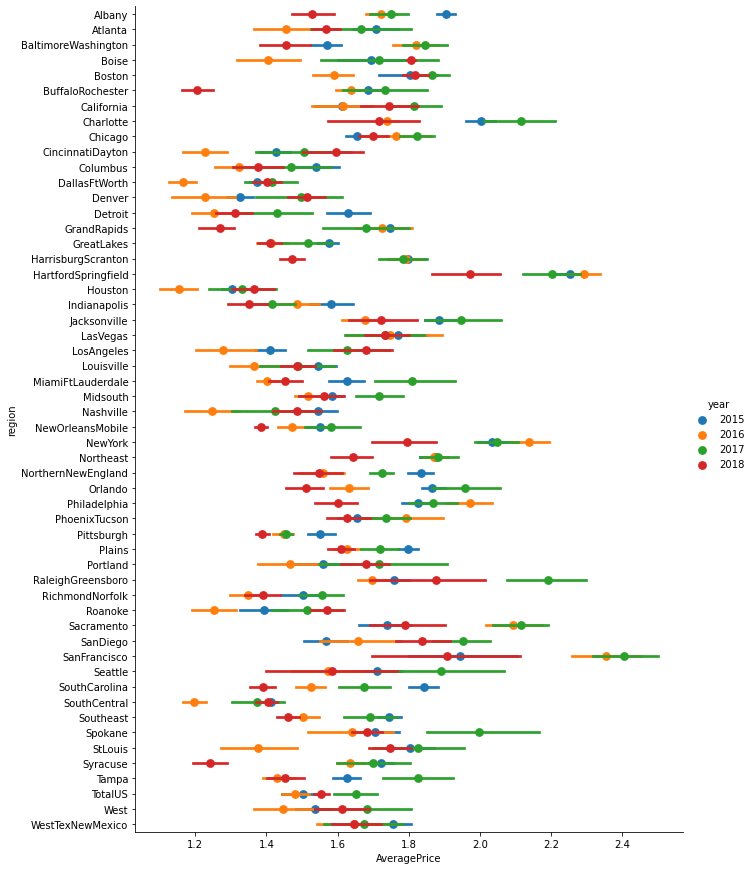

In [16]:
# Now let's look at the prices prices of the various types in the various regions accross the years  
organic = df[df['type'] == 'organic']
sns.factorplot(x = 'AveragePrice', y = 'region', hue = 'year', data = organic , size=12 , aspect=0.8, join=False)

We notice the lowest price for organic avocados in Houston and the highest price in San Francisco

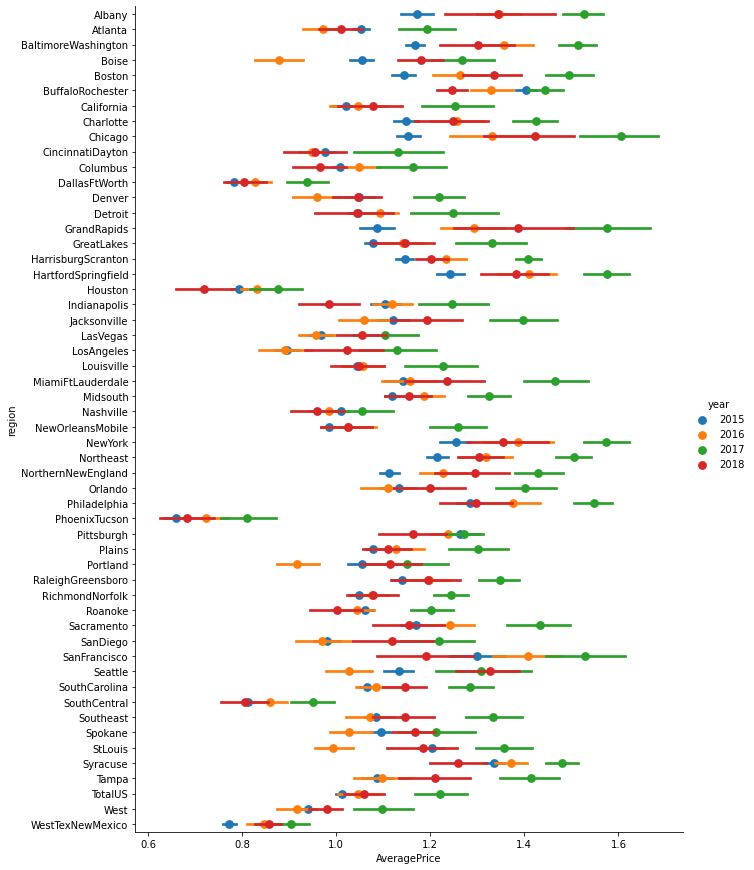

In [17]:
conventional = df[df['type'] == 'conventional']
sns.factorplot(x = 'AveragePrice', y = 'region', hue = 'year', data = conventional , size=12 , aspect=0.8, join=False)

We can see the lowest price for conventional avocados in Phoenix and the highest price in New York

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

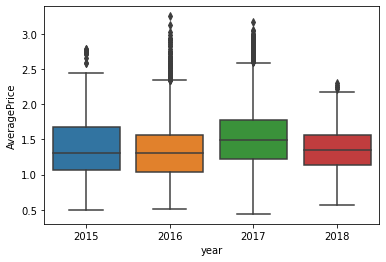

In [18]:
sns.boxplot(x='year', y='AveragePrice', data=df)

In [19]:
year_2015 = df[df['year']== 2015]
year_2016 = df[df['year']== 2016]
year_2017 = df[df['year']== 2017]
year_2018 = df[df['year']== 2018]
print('Average Price 2015: {price}'.format(price = np.mean(year_2015.AveragePrice)))
print('Average Price 2016: {price}'.format(price = np.mean(year_2016.AveragePrice)))
print('Average Price 2017: {price}'.format(price = np.mean(year_2017.AveragePrice)))
print('Average Price 2018: {price}'.format(price = np.mean(year_2018.AveragePrice)))

Average Price 2015: 1.3755903829029397
Average Price 2016: 1.3386396011395996
Average Price 2017: 1.515127577770011
Average Price 2018: 1.347530864197531


2017 was the year avocados were most expensive with  an average price of 1.5 meanwhile avocados were cheapest in 2016 with an average price of 1.3

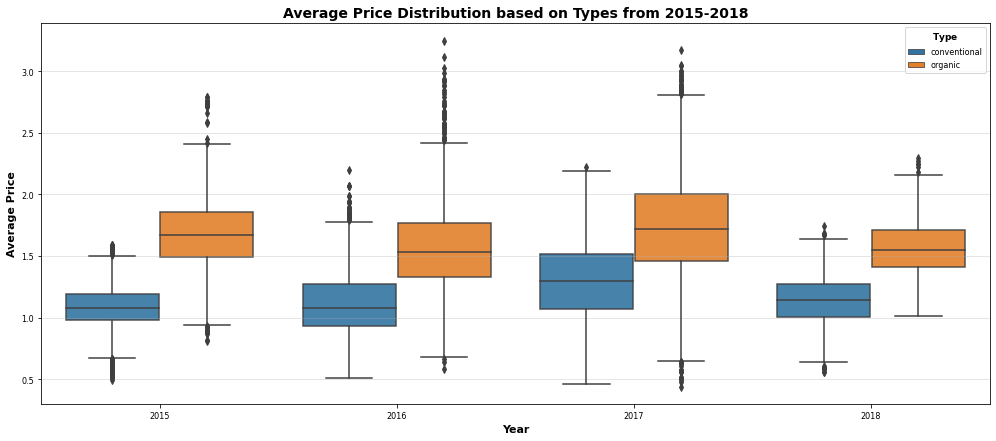

In [20]:
# now we'll look at the prices of the different types accross the various years
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif')
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = df, ax = ax, boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

Organic avocados lead the pricing all through the years

<AxesSubplot:title={'center':'Average price each month'}, xlabel='months', ylabel='AveragePrice'>

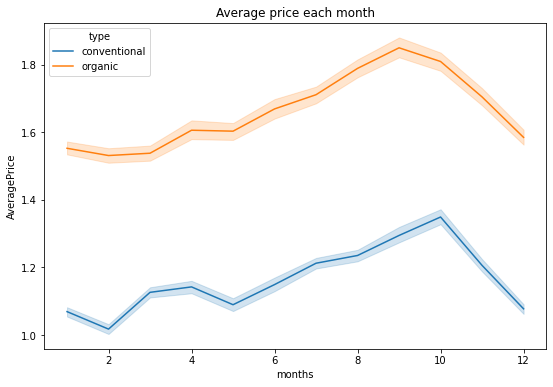

In [21]:
# Let's look at the prices in the various months
df['Date'] = pd.to_datetime(df['Date'])
df["months"] = df['Date'].map(lambda x: x.month)
plt.figure(figsize = (9,6))
plt.title('Average price each month')
sns.lineplot(x = 'months', y = 'AveragePrice' , data = df, hue = 'type')

we notice that the prices increase  gradually from the 1st to the 6th month and then goes very high from the 6th to the 10th month and finall falls back drastically from the 10th tho the 12th month

In [22]:
# Let's take a look at seasonal prices
seasons = {1: 'winter', 4: 'Autumn', 3: 'summer', 2: 'spring'}
df['seasons'] = [(month%12 + 3)//3 for month in df['months']]
df.seasons = [seasons[i] for i in df.seasons]

<AxesSubplot:title={'center':'Average price each season'}, xlabel='seasons', ylabel='AveragePrice'>

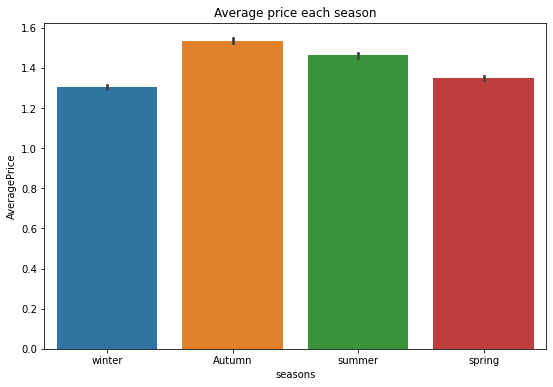

In [23]:
plt.figure(figsize = (9,6))
plt.title('Average price each season')
sns.barplot(x = 'seasons', y= 'AveragePrice', data = df)

We can see that the prices are lower in winter and spring and very high in Autumn. This is normal since avocado trees usually bloom in the late summer and spring, with the huge availability of avocados in spring the prices will definitely drop and furthest from spring is Aautumn when availability is relatively low since production is low in this season 

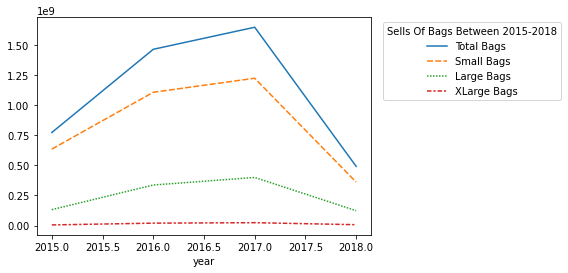

In [24]:
# Let's have a look the number of bags sold accross the years
avo =pd.DataFrame(df.groupby('year')[["Total Bags","Small Bags","Large Bags","XLarge Bags"]].sum())
sns.lineplot(data =avo)
plt.legend(title ="Sells Of Bags Between 2015-2018", loc = "upper left",bbox_to_anchor=(1.02,1) )

We notice a similar trend in the sales of different bag sizes accross the years sales sclaed up from 2015 to 2017 and the drops drastically in 2018 except for the Xlarge bags that seem to have the same sales quantity throughout the years

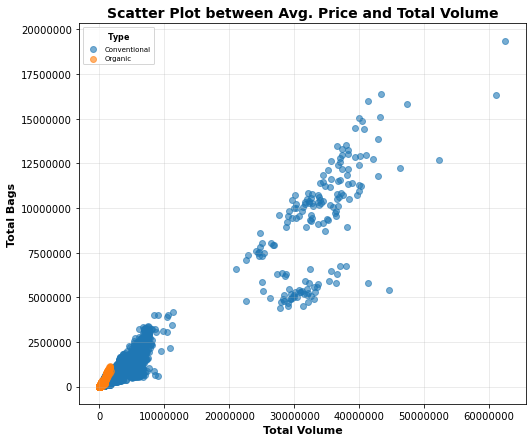

In [25]:
# Let's see the relationship between TotalVolume Total Bags
# --- Seperating Total Volume & Total Bags based on Type ---
x0 = df.xs('Total Volume', axis = 1)[df.type == 'conventional']
x1 = df.xs('Total Volume', axis = 1)[df.type == 'organic']
y0 = df.xs('Total Bags', axis = 1)[df.type == 'conventional']
y1 = df.xs('Total Bags', axis = 1)[df.type == 'organic']

# --- Creating Scatter Plot ---
plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif')
plt.scatter(x = x0, y = y0,  alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left', frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

We can be see that if the total avocado sold for both types increases, then the total bags also increases
Also the distribution for organic avocados relatively lower and congregate at the same spot compared to conventional avocados which more spread out.

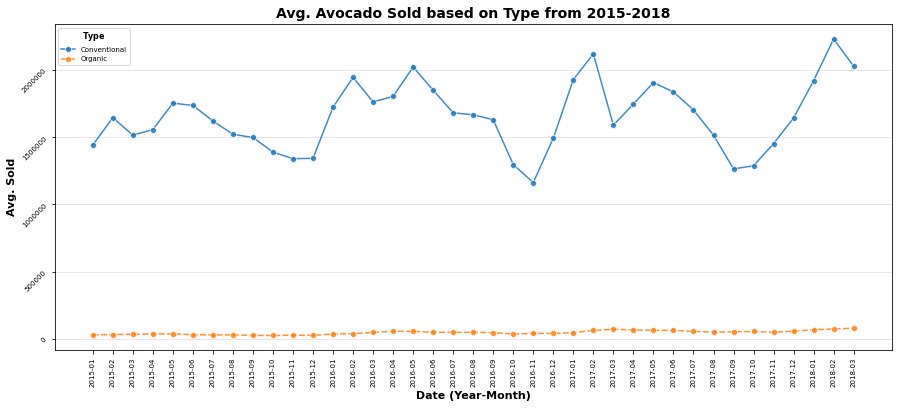

In [26]:
# Now lets look at sales over the years by avocado type
# --- Calculating Mean of `Total Volume` grouped by Type and Date ---
df_group = df[['Date', 'Total Volume', 'type']]
df_group['Date'] = pd.DatetimeIndex(df_group['Date'])
df_group['Date'] = df_group['Date'].apply(lambda x: x.strftime('%Y-%m'))
group = df_group.groupby(['Date', 'type'])
mnth_avg = group.aggregate({'Total Volume': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (15, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,fontfamily = 'sans-serif')
sns.lineplot(data = mnth_avg, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(rotation = '45', fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True);

We can  see that from the end of the year to early February  of the next year there is an increase in conventional avocado sales. The highest sales of conventional avocado was in February 2018 while the lowest sales was in November 2016.
However, we notice no major increase or decrease in organic avocado sales from 2015 until beginning of 2018.

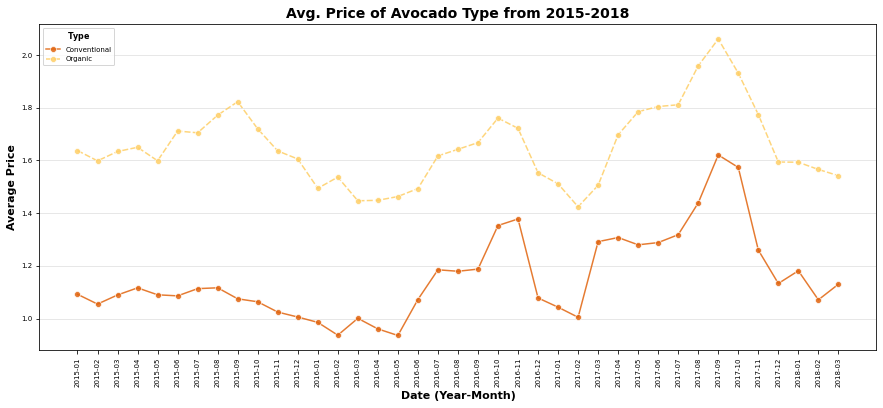

In [27]:
# Now let's look at Average Price accross the years
# --- Calculating Mean of `AveragePrice` grouped by Type and Date ---
df_group1 = df[['Date', 'AveragePrice', 'type']]
df_group1['Date'] = pd.DatetimeIndex(df_group1['Date'])
df_group1['Date'] = df_group1['Date'].apply(lambda x: x.strftime('%Y-%m'))
group1 = df_group1.groupby(['Date', 'type'])
mnth_avg1 = group1.aggregate({'AveragePrice': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (15, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif')
sns.lineplot(data = mnth_avg1, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,loc = 'upper left', frameon = True);

We can see that price of organic avocados always reached its peak between August-September for past 3 years (2015-2017).
However, the case with conventional avocados which doesn't have seasonality

Now we will carry out some preprocessing before training our model

In [28]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,months,seasons
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,winter
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,winter
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,winter
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,winter
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,Autumn


In [4]:
# Let's check for skewness
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

We see that the data points do not follow a normal disribution, we will apply box-cox transformation

In [5]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

Unnamed: 0: Number of unique values 53
________________________________________________
Date: Number of unique values 169
________________________________________________
AveragePrice: Number of unique values 259
________________________________________________
Total Volume: Number of unique values 18237
________________________________________________
4046: Number of unique values 17702
________________________________________________
4225: Number of unique values 18103
________________________________________________
4770: Number of unique values 12071
________________________________________________
Total Bags: Number of unique values 18097
________________________________________________
Small Bags: Number of unique values 17321
________________________________________________
Large Bags: Number of unique values 15082
________________________________________________
XLarge Bags: Number of unique values 5588
________________________________________________
type: Number of unique val

In [32]:
# We added the seasons and months columns for explanatory purposes, so we will drop them before training
df = df.drop(columns=['months','seasons'])

In [52]:
# separating the categorical columns
df['Date'] = df['Date'].to_string
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['Date', 'type', 'region']

In [53]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


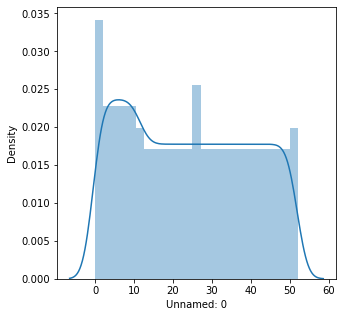

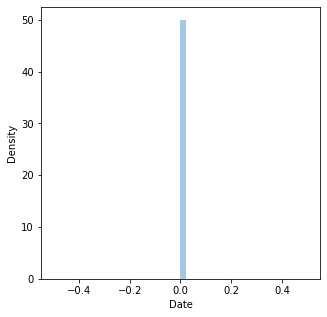

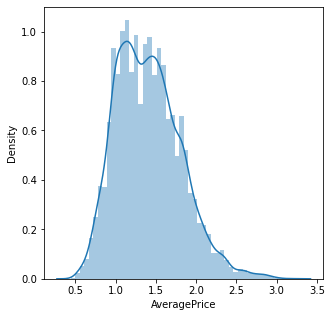

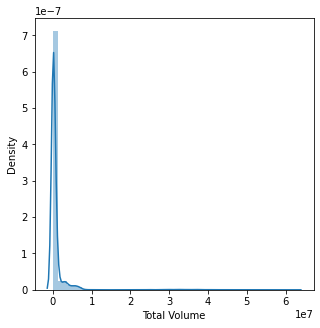

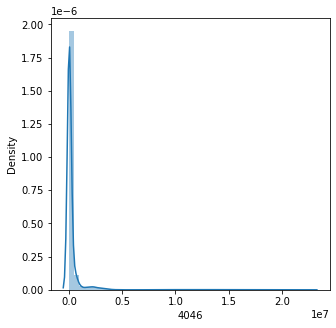

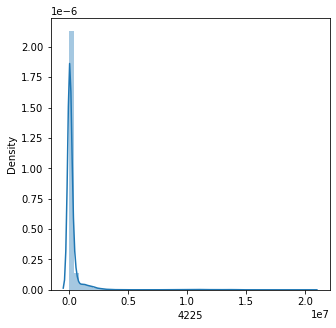

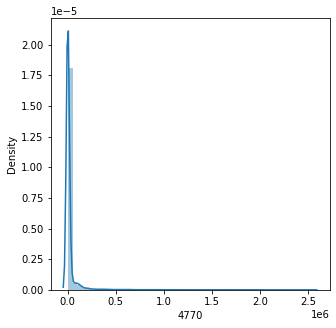

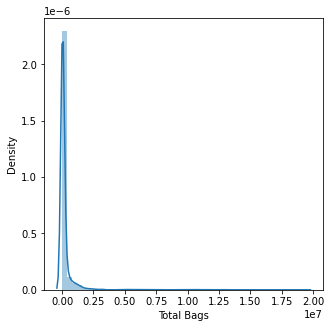

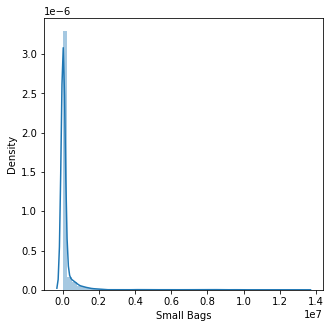

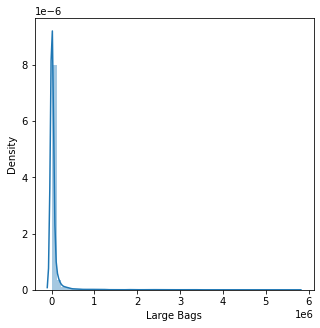

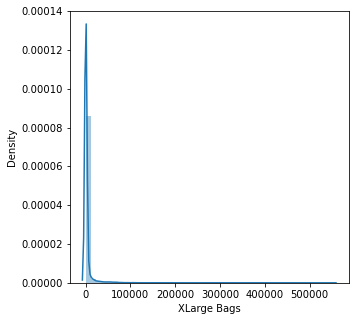

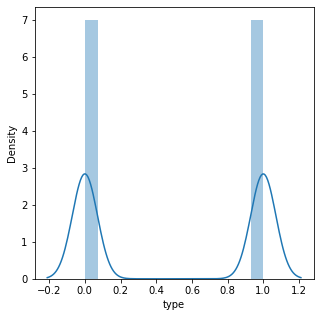

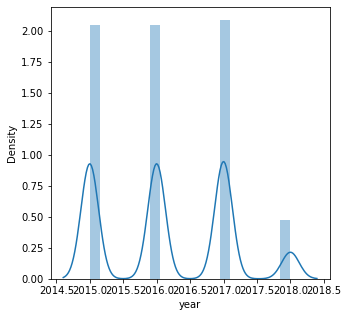

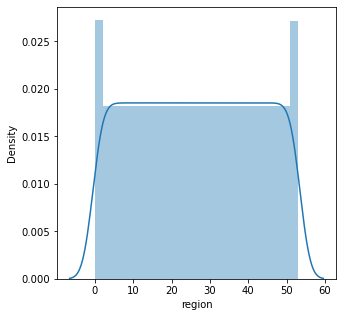

In [54]:
# let's check the distribution of the features
for column in df.columns:
    plt.figure(figsize = (5,5))
    sns.distplot(df[column])

In [8]:
df.dtypes

Unnamed: 0        int64
Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [55]:
# We will do some transformation to try make the data distributions normal
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox', standardize=True)
power2 = PowerTransformer(standardize=True)
for column in df.columns:
    if df[column].skew() >= 1:
        try:
            power.fit_transform(df[column].to_numpy().reshape(-1, 1))
        except ValueError:
            power2.fit_transform(df[column].to_numpy().reshape(-1, 1))

In [56]:
# Now we will split the data into testing and training sets
x = df.drop('AveragePrice', axis=1)
y = df.AveragePrice
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [57]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.192308,0.0,0.025167,0.030851,0.014292,0.002382,0.029671,0.031668,0.026200,0.000139,0.0,1.000000,0.339623
1,0.365385,0.0,0.001598,0.001384,0.000793,0.000912,0.002579,0.003630,0.000000,0.000004,0.0,0.333333,0.886792
2,0.461538,0.0,0.005114,0.005008,0.003899,0.000719,0.006143,0.008066,0.000638,0.006833,0.0,0.666667,0.716981
3,0.480769,0.0,0.082139,0.152556,0.028933,0.038136,0.056457,0.055346,0.062626,0.000101,0.0,0.000000,0.867925
4,0.461538,0.0,0.000257,0.000362,0.000210,0.000000,0.000195,0.000244,0.000079,0.000000,1.0,0.000000,1.000000


In [39]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

         feature           VIF
0     Unnamed: 0  3.407834e+00
1           Date           NaN
2   Total Volume  6.864569e+08
3           4046  9.050803e+07
4           4225  8.504680e+07
5           4770  6.830387e+05
6     Total Bags  2.251800e+14
7     Small Bags  1.286743e+14
8     Large Bags  1.390000e+13
9    XLarge Bags  7.501249e+10
10          type  2.064087e+00
11          year  2.548735e+00
12        region  3.957766e+00


In [40]:
#Create a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Linear Regression Algorithm to the Training Set
    from sklearn.linear_model import LinearRegression
    log = LinearRegression()
    log.fit(x_train, y_train)

    #Using AdaBoostRegressor 
    from sklearn.ensemble import AdaBoostRegressor
    adb = AdaBoostRegressor()
    adb.fit(x_train, y_train)

    #Using KNNieghborsRegressor Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor()
    knr.fit(x_train, y_train)

    # Gradient Boost Regressor
    from sklearn.ensemble import GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(x_train, y_train)

    # Using Gaussian Regressor method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.gaussian_process import GaussianProcessRegressor
    gauss = GaussianProcessRegressor()
    gauss.fit(x_train, y_train)

    #Using DecisionTreeRegressor of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Linear Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]AdaBoost Regressor Training Accuracy:', adb.score(x_train, y_train))
    print('[2]KNieghborsRegressor Training Accuracy:', knr.score(x_train, y_train))
    print('[3]Gradient Boosting Regressor Training Accuracy:', gbr.score(x_train, y_train))
    print('[4]Gaussian Regressor Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Regressor Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Regressor Training Accuracy:', forest.score(x_train, y_train))

    return log, adb, knr, gbr, gauss, tree, forest

In [90]:
model = models(x_train,y_train)

[0]Linear Regression Training Accuracy: 0.42553773637990344
[1]AdaBoost Regressor Training Accuracy: 0.5724743673131514
[2]KNieghborsRegressor Training Accuracy: 0.8077106342604707
[3]Gradient Boosting Regressor Training Accuracy: 0.7669483974972473
[4]Gaussian Regressor Training Accuracy: 0.7805322476541651
[5]Decision Tree Regressor Training Accuracy: 1.0
[6]Random Forest Regressor Training Accuracy: 0.9848126374074153


In [91]:
for i in range(len(model)):
    cm = model[i].score(x_test,y_test)
    
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, cm))
    print()

Model[0] Testing Accuracy = "0.4066696070154452 !"

Model[1] Testing Accuracy = "0.5389606486196159 !"

Model[2] Testing Accuracy = "0.6677146098736524 !"

Model[3] Testing Accuracy = "0.7434515988900544 !"

Model[4] Testing Accuracy = "-787.8023987011884 !"

Model[5] Testing Accuracy = "0.7789626953997743 !"

Model[6] Testing Accuracy = "0.89333287193029 !"



In [100]:
# Regularization Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mae', 'poisson'],
             'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [101]:
rfr = RandomForestRegressor(criterion='mae',max_features='auto')
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_dec = rfr.predict(x_test)

rfs = r2_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rfr,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

88.92272555890086
24.87249561489085


In [92]:
# Regularization Linear Regression
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept':[True,False],
             'normalize':[True,False],
             'n_jobs':[1,-1]}
lr = LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [93]:
lr = LinearRegression(fit_intercept:=True, n_jobs=1, normalize=False)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = r2_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

40.66696070154452
-1016.4234321046135


In [99]:
# Regularization Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
parameters = {'loss':['linear','exponential','square'],
             'n_estimators':list(range(10,100)),
             'random_state':list(range(0,10))}
abr = AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'loss': 'square', 'n_estimators': 98, 'random_state': 6}


In [102]:
abr = AdaBoostRegressor(loss='square',random_state=6,n_estimators=98)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)
pred_dec = abr.predict(x_test)

absc = r2_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(abr,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

55.17491659392557
-8.305962609793745


In [58]:
# Regularization Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators':list(range(10)),
             'criterion':['squared_error','mse', 'friedman_mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'n_estimators': 9}


In [ ]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', n_estimators=99)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = gbr.predict(x_test)

gbsc = r2_score(y_test, pred_dec)
print(gbsc*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbc = gbscore.mean()
print(gbc*100)

74.27603428952148


In [94]:
# Regularization Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['squared_error','poisson', 'friedman_mse','absolute_error']}
dtr = DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'min_samples_split': 9, 'splitter': 'best'}


In [95]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=9, splitter='best')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dec = dtr.predict(x_test)

dtsc = r2_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dtr,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

78.62573149167976
-22.69361236427896


From the performance we can see that the RandomForestClassifier performed best, we will save it for production

In [47]:
# saving the best model
import pickle
pickle.dump(gbr, open('avocado_price.pkl','wb'))

NameError: name 'gbr' is not defined

### Now we will do some classification to predict the type of Avocado

In [51]:
# importing the dataset
df = pd.read_csv('avocado.csv')
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [42]:
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['Date', 'type', 'region']

In [43]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [44]:
# We will do some transformation to try make the data distributions normal
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox', standardize=True)
power2 = PowerTransformer(standardize=True)
for column in df.columns:
    if df[column].skew() >= 1:
        try:
            power.fit_transform(df[column].to_numpy().reshape(-1, 1))
        except ValueError:
            power2.fit_transform(df[column].to_numpy().reshape(-1, 1))

In [45]:
# Now we will split the data into testing and training sets
x = df.drop('type', axis=1)
y = df.type
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
# Now we will scale the features to remove variances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.038462,0.601190,0.117438,0.004284,0.000109,0.004972,0.000378,0.008428,0.001640,0.024705,0.000070,0.333333,0.169811
1,0.673077,0.095238,0.224199,0.494259,0.608246,0.531530,0.446284,0.273745,0.342499,0.120155,0.057866,0.000000,0.962264
2,0.461538,0.785714,0.327402,0.056250,0.088236,0.025378,0.002042,0.050924,0.044584,0.056745,0.118334,0.666667,0.867925
3,0.807692,0.363095,0.113879,0.017455,0.030725,0.008904,0.043377,0.006406,0.005795,0.006892,0.012918,0.333333,0.339623
4,0.903846,0.648810,0.266904,0.012347,0.002238,0.029078,0.003552,0.006174,0.008896,0.000095,0.000000,0.666667,0.075472


In [11]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [12]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8294974166275246
[1]K Nearest Neighbor Training Accuracy: 0.9263347424455927
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8396743385000783
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8698919680601221
[4]Ada Boost Training Accuracy: 0.9949115390637232
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


In [13]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[2277  461]
 [ 392 2345]]
Model[0] Testing Accuracy = "0.8442009132420092 !"

[[2413  325]
 [ 348 2389]]
Model[1] Testing Accuracy = "0.8770776255707763 !"

[[2278  460]
 [ 356 2381]]
Model[2] Testing Accuracy = "0.8509589041095891 !"

[[2408  330]
 [ 329 2408]]
Model[3] Testing Accuracy = "0.8796347031963471 !"

[[2734    4]
 [  21 2716]]
Model[4] Testing Accuracy = "0.9954337899543378 !"

[[2721   17]
 [  28 2709]]
Model[5] Testing Accuracy = "0.9917808219178083 !"

[[2737    1]
 [   7 2730]]
Model[6] Testing Accuracy = "0.9985388127853881 !"



In [31]:
# Regularization Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 9}


In [32]:
rf = RandomForestClassifier(criterion='gini',max_features='log2', n_estimators=9)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

99.76255707762557
98.56971885710854


In [18]:
# Regularization Logistic Regression
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': False, 'intercept_scaling': 1, 'penalty': 'none'}


In [22]:
lr = LogisticRegression(fit_intercept:='l2', intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

84.42009132420092
93.06807870048839


In [23]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 1}


In [24]:
ab = AdaBoostClassifier(learning_rate=1.0,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

97.42465753424658
95.17225736456226


In [25]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_split': 2, 'splitter': 'best'}


In [26]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2, splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

98.2283105022831
94.79978376511487


In [27]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,100)),
             'kernel':['poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}


In [28]:
svc = SVC(gamma='scale', kernel='rbf', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

87.96347031963471
89.42951080611314


In [35]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':list(range(10)),
             'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [39]:
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = dt.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

98.2283105022831
93.80243339327343


From the performance we can see that the RandomForestClassifier performed best, we will save it for production

In [40]:
# saving the best model
import pickle
pickle.dump(rf, open('avocado_class.pkl','wb'))